<a href="https://colab.research.google.com/github/JemiJey/deeplearningai/blob/master/TP_W2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 55.7MB/s 
     |████████████████████████████████| 419kB 42.6MB/s 
     |████████████████████████████████| 3.0MB 37.7MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [5]:
fashion_MNIST = tf.keras.datasets.fashion_mnist
(training_images, training_label), (test_images, test_labels) = fashion_MNIST.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 

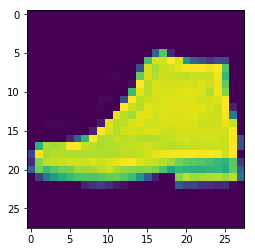

In [8]:
import matplotlib.pyplot as plt
plt.imshow(training_images[42])
print(training_label[42])
print(training_images[42])

# Normalizing the data

notice all of the values in the number are between 0 and 255, if we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, this process calles "**normalizing**" 
Neural Networks work better with normalized data

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

# Design our Model

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])



**Sequential** - That defines a SEQUENCE of layers in the neural network

**Flatten** - Images are square when we use Flatten it just takes that square and turns it into a 1 dimensional set.

**Dense** - Adds a layer of neurons

Each layer of neuron need an **activation function** to tell them what to do.

**Relu** - effectively means if x>0 return x, else return 0 - so what it does is it only passes values 0 or greater to the next layer in the network

**Softmax** - takes a set of values, and effectively picks the biggest one, so for example if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0,0] - **the goal is to save a lot of coding!!**

# Compiling Model
**Model is defined we need to build it**, we do this by compiling it with an optimizer and loss function as before - and then we train it by calling **model.fit** asking it to fit our training labels, 

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_label, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.5027
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3764
Epoch 3/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3365
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3122
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2953


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_label, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1334
Epoch 2/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1284
Epoch 3/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1262
Epoch 4/30
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1231
Epoch 5/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1214
Epoch 6/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1180
Epoch 7/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1171
Epoch 8/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1150
Epoch 9/30
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1098
Epoch 10/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1099
Epoch 11/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1093
Epoch 12/30
60000/60000 [=====

In [20]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.6162


0.6162476009689272